In [1]:
# import numpy, pandas, seaborn, matplotlib just because
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import pickle

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Time series forecasting on COVID-19

In [2]:
covid = pd.read_csv('https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv')
covid = covid.groupby(['State']).sum()
covid.drop(['countyFIPS', 'stateFIPS'], axis=1, inplace=True)
covid = covid.transpose()
covid = covid.reset_index()
covid = covid.rename_axis('', axis=1)
covid = covid.rename(columns={'index':'date'})
covid.columns= covid.columns.str.lower()
covid['overall'] = covid.iloc[:,0:].sum(axis=1)

In [3]:
covid.tail()

,date,ak,al,ar,az,ca,co,ct,dc,de,...,tn,tx,ut,va,vt,wa,wi,wv,wy,overall
231,9/9/20,5896,134416,66402,206541,747809,59917,53871,14387,18308,...,166587,654570,55689,129283,1654,78007,83333,11803,4151,6311305
232,9/10/20,6020,135565,66804,206993,750062,60183,54093,14412,18466,...,168237,658588,56048,130519,1660,78464,84880,12003,4197,6346829
233,9/11/20,6112,136703,67911,207521,755495,60491,54326,14493,18559,...,169856,662083,56657,131637,1668,79011,86250,12170,4261,6393202
234,9/12/20,6216,137646,68309,208126,758504,60907,54326,14552,18726,...,170891,666525,57300,132939,1677,79476,87603,12521,4294,6432407
235,9/13/20,6278,138755,70219,208512,760490,61325,54326,14592,18849,...,171824,670029,58666,133814,1684,79826,89185,12699,4344,6468204


In [4]:
covid_az = covid[['date', 'az']].copy()
covid_fl = covid[['date', 'fl']].copy()
covid_ga = covid[['date', 'ga']].copy()
covid_ia = covid[['date', 'ia']].copy()
covid_mi = covid[['date', 'mi']].copy()
covid_nv = covid[['date', 'nv']].copy()
covid_nh = covid[['date', 'nh']].copy()
covid_nc = covid[['date', 'nc']].copy()
covid_oh = covid[['date', 'oh']].copy()
covid_pa = covid[['date', 'pa']].copy()
covid_tx = covid[['date', 'tx']].copy()
covid_wi = covid[['date', 'wi']].copy()
covid_overall = covid[['date', 'overall']].copy()

In [5]:
covid_az.rename(columns={covid_az.columns[0]: "ds", covid_az.columns[1]: "y"}, inplace = True)
covid_fl.rename(columns={covid_fl.columns[0]: "ds", covid_fl.columns[1]: "y"}, inplace = True)
covid_ga.rename(columns={covid_ga.columns[0]: "ds", covid_ga.columns[1]: "y"}, inplace = True)
covid_ia.rename(columns={covid_ia.columns[0]: "ds", covid_ia.columns[1]: "y"}, inplace = True)
covid_mi.rename(columns={covid_mi.columns[0]: "ds", covid_mi.columns[1]: "y"}, inplace = True)
covid_nv.rename(columns={covid_nv.columns[0]: "ds", covid_nv.columns[1]: "y"}, inplace = True)
covid_nh.rename(columns={covid_nh.columns[0]: "ds", covid_nh.columns[1]: "y"}, inplace = True)
covid_nc.rename(columns={covid_nc.columns[0]: "ds", covid_nc.columns[1]: "y"}, inplace = True)
covid_oh.rename(columns={covid_oh.columns[0]: "ds", covid_oh.columns[1]: "y"}, inplace = True)
covid_pa.rename(columns={covid_pa.columns[0]: "ds", covid_pa.columns[1]: "y"}, inplace = True)
covid_tx.rename(columns={covid_tx.columns[0]: "ds", covid_tx.columns[1]: "y"}, inplace = True)
covid_wi.rename(columns={covid_wi.columns[0]: "ds", covid_wi.columns[1]: "y"}, inplace = True)
covid_overall.rename(columns={covid_overall.columns[0]: "ds", covid_overall.columns[1]: "y"}, inplace = True)

In [6]:
# covid_az['cap'] = 12000000
# covid_fl['cap'] = 12000000
# covid_ga['cap'] = 12000000
# covid_ia['cap'] = 12000000
# covid_mi['cap'] = 12000000
# covid_nv['cap'] = 12000000
# covid_nh['cap'] = 12000000
# covid_nc['cap'] = 12000000
# covid_oh['cap'] = 12000000
# covid_pa['cap'] = 12000000
# covid_tx['cap'] = 12000000
# covid_wi['cap'] = 12000000
# covid_overall['cap'] = 12000000

## Modeling

In [7]:
model = Prophet()
model.fit(covid_overall)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
covid_overall.tail()

,ds,y
231,9/9/20,6311305
232,9/10/20,6346829
233,9/11/20,6393202
234,9/12/20,6432407
235,9/13/20,6468204


In [9]:
future = model.make_future_dataframe(periods=60) # set periods to number making the final date 2020-11-03
future.shape

(296, 1)

In [10]:
# future['cap'] = 12000000

In [11]:
future.tail()

,ds
291,2020-11-08
292,2020-11-09
293,2020-11-10
294,2020-11-11
295,2020-11-12


In [12]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
291,2020-11-08,9.145063e+06,8.549118e+06,9.779099e+06
292,2020-11-09,9.189323e+06,8.595321e+06,9.828603e+06
293,2020-11-10,9.233657e+06,8.618057e+06,9.914767e+06
294,2020-11-11,9.279564e+06,8.654447e+06,9.946189e+06
295,2020-11-12,9.327793e+06,8.688320e+06,1.002253e+07


In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-929.717593,-36260.558787,29552.191822,-929.717593,-929.717593,-3043.634467,-3043.634467,-3043.634467,-3043.634467,-3043.634467,-3043.634467,0.0,0.0,0.0,-3973.352060
1,2020-01-23,-894.196409,-36809.447759,29614.075738,-894.196409,-894.196409,-796.304879,-796.304879,-796.304879,-796.304879,-796.304879,-796.304879,0.0,0.0,0.0,-1690.501288
2,2020-01-24,-858.675225,-29833.061523,35505.381154,-858.675225,-858.675225,3197.658925,3197.658925,3197.658925,3197.658925,3197.658925,3197.658925,0.0,0.0,0.0,2338.983700
3,2020-01-25,-823.154041,-29316.353566,37584.926499,-823.154041,-823.154041,4535.430633,4535.430633,4535.430633,4535.430633,4535.430633,4535.430633,0.0,0.0,0.0,3712.276592
4,2020-01-26,-787.632857,-34448.964778,32352.544455,-787.632857,-787.632857,398.877439,398.877439,398.877439,398.877439,398.877439,398.877439,0.0,0.0,0.0,-388.755419


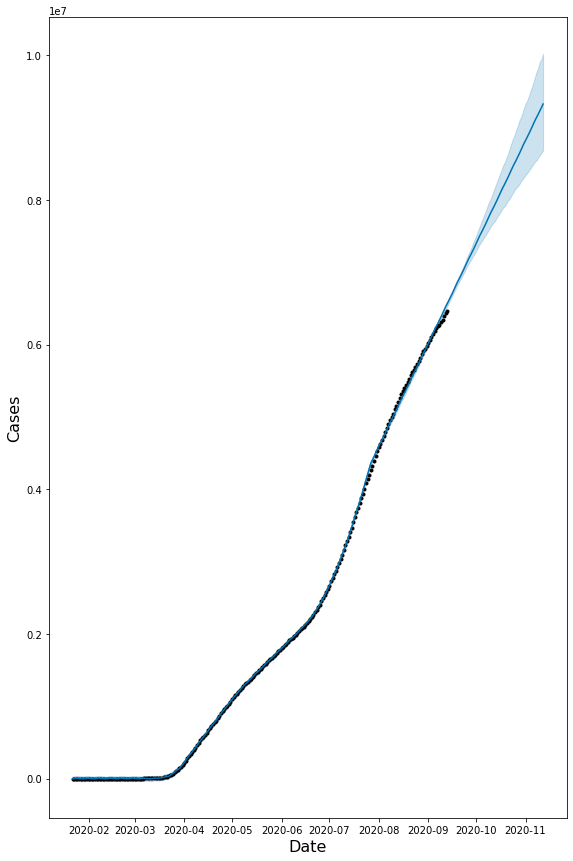

In [14]:
fig1 = model.plot(forecast, figsize=(8, 12))
# plt.title('US COVID-19 Forecast', fontsize = 30)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Cases', fontsize = 16)
plt.grid(b=None)

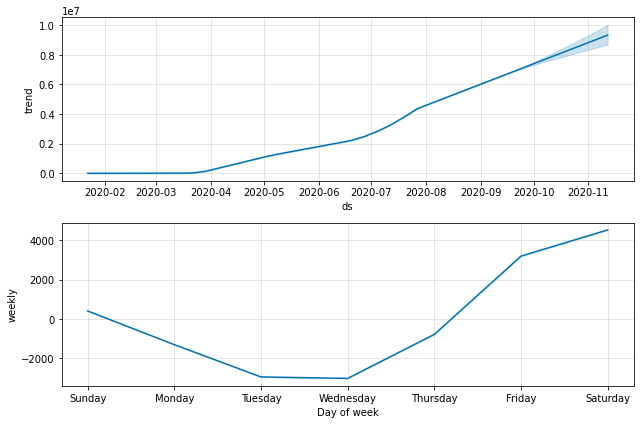

In [15]:
fig2 = model.plot_components(forecast)

Text(108.125, 0.5, 'Cases')

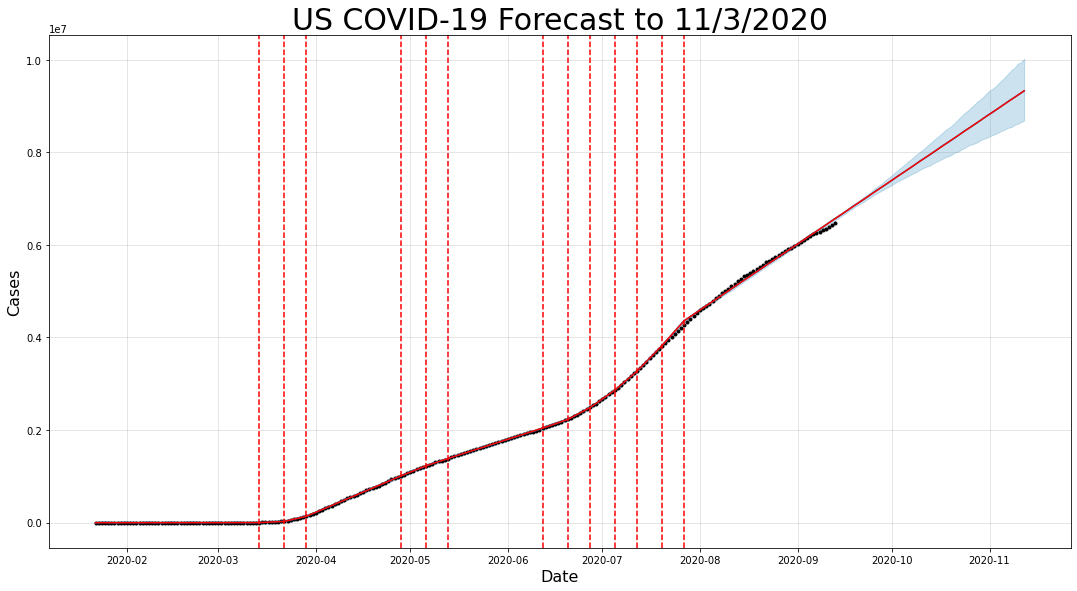

In [16]:
fig = model.plot(forecast, figsize=(15, 8))
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.title('US COVID-19 Forecast to 11/3/2020', fontsize = 30)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Cases', fontsize = 16)